## Test QuantumClassifier 

In [6]:
from quantum_computing.p2.qml.quantum_model import QuantumClassifier
from quantum_computing.p2.utils.data_prepperation import (
    load_iris_binary,
    preprocess_data,
)
from quantum_computing.p2.qml.encoders import AngleEncoder, HadRotZRotZZEncoder, NoEncoder
from quantum_computing.p2.qml.ansatzes import SimpleAnsatz, AdvancedAnsatz
from quantum_computing.p2.qml.optimizers import AdamOptimizer
from quantum_computing.p2.qml.initializers import NormalInitializer, XavierInitializer,ZeroInitializer, RandomInitializer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit import QuantumCircuit



In [23]:
X, y = load_iris_binary()

X_train, X_test, y_train, y_test = preprocess_data(X, y, 2, 0.3)

classifier = QuantumClassifier(
    num_qubits=X_train.shape[1], encoder=AngleEncoder(rotation_gate="ry"), ansatz=SimpleAnsatz(),
    optimizer= AdamOptimizer(learning_rate=0.05,beta1=0.9, beta2=0.999),
    shots=40,
    measurement_qubit=0,
    initializer= RandomInitializer(),
)

print(classifier.visualize_circuit(X_train[0]))


Loading Iris dataset...
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Dataset shape: (100, 4)
Target distribution: [50 50]

Preprocessing data...
Using 2 features: (100, 2)
Training set: 70 samples
Test set: 30 samples
     ┌───┐┌────────────┐┌────────────┐     ┌─┐
q_0: ┤ H ├┤ Ry(5.3659) ├┤ Ry(3.5751) ├──■──┤M├
     ├───┤├────────────┤├────────────┤┌─┴─┐└╥┘
q_1: ┤ H ├┤ Ry(11π/12) ├┤ Ry(2.2104) ├┤ X ├─╫─
     └───┘└────────────┘└────────────┘└───┘ ║ 
c: 1/═══════════════════════════════════════╩═
                                            0 


In [24]:
print("=== TRAINING SIMPLE CLASSIFIER ===")
results = classifier.train(
    X_train=X_train, 
    y_train=y_train, 
    epochs=40, 
    X_val=X_test, 
    y_val=y_test,
    verbose=True,
    batch_size=8
)

=== TRAINING SIMPLE CLASSIFIER ===
Starting quantum machine learning training...
QUANTUM MACHINE LEARNING TRAINING

MODEL ARCHITECTURE:
 • Number of qubits: 2
 • Number of parameters: 2
 • Encoder type: AngleEncoder
 • Ansatz type: SimpleAnsatz
 • Measurement qubit: 0

TRAINING CONFIGURATION:
 • Optimizer: AdamOptimizer
 • Learning rate: 0.05
 • Epochs: 40
 • Batch size: 8
 • Convergence tolerance: 1e-06
--------------------------------------------------------------------------------
Epoch hello 1/40: Loss = 0.3226, Acc = 0.8857 | Val Loss = 0.5005, Val Acc = 0.8333
Epoch hello 6/40: Loss = 0.3386, Acc = 0.8714 | Val Loss = 0.4975, Val Acc = 0.8333
Epoch hello 11/40: Loss = 0.3155, Acc = 0.8571 | Val Loss = 0.4768, Val Acc = 0.8667
Epoch hello 16/40: Loss = 0.3360, Acc = 0.8571 | Val Loss = 0.4880, Val Acc = 0.8000
Epoch hello 21/40: Loss = 0.3048, Acc = 0.9143 | Val Loss = 0.4963, Val Acc = 0.8000
Epoch hello 26/40: Loss = 0.3453, Acc = 0.8857 | Val Loss = 0.5479, Val Acc = 0.8000
Epo

=== PLOTTING PROBABILITY MAP ===


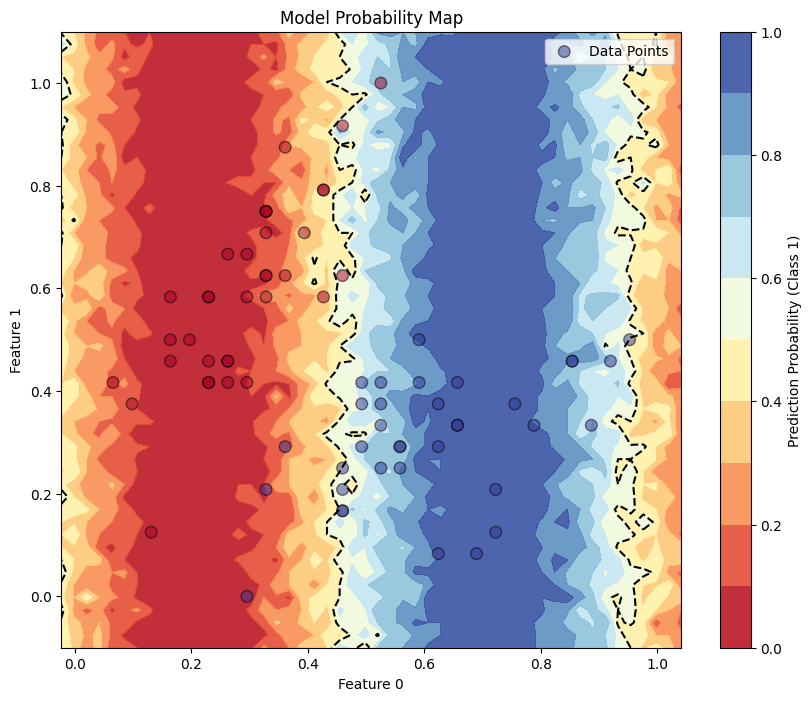

In [25]:
from quantum_computing.p2.utils.visualization import plot_probability_map

print("=== PLOTTING PROBABILITY MAP ===")
plot_data1 = plot_probability_map(
    model=classifier,
    X_data=X_train,
    y_data_scatter=y_train
)

### Advanced encoding and ansatz


In [26]:
advanced_classifier = QuantumClassifier(
    num_qubits=X_train.shape[1], encoder=HadRotZRotZZEncoder(), ansatz=AdvancedAnsatz(1),
    optimizer=AdamOptimizer(learning_rate=0.05),
    shots=40,
    measurement_qubit=0
)

print(advanced_classifier.visualize_circuit(X_train[0]))

     ┌───┐┌────────────┐                        ┌────────────┐     »
q_0: ┤ H ├┤ Rz(5.3659) ├──■──────────────────■──┤ Ry(1.4777) ├──■──»
     ├───┤├────────────┤┌─┴─┐┌────────────┐┌─┴─┐├────────────┤┌─┴─┐»
q_1: ┤ H ├┤ Rz(11π/12) ├┤ X ├┤ Rz(2.4594) ├┤ X ├┤ Ry(2.3884) ├┤ X ├»
     └───┘└────────────┘└───┘└────────────┘└───┘└────────────┘└───┘»
c: 1/══════════════════════════════════════════════════════════════»
                                                                   »
«     ┌────────────┐┌─┐
«q_0: ┤ Ry(2.3787) ├┤M├
«     ├────────────┤└╥┘
«q_1: ┤ Ry(3.1714) ├─╫─
«     └────────────┘ ║ 
«c: 1/═══════════════╩═
«                    0 


In [29]:
print("=== TRAINING ADVANCED CLASSIFIER ===")
training_results_advanced = advanced_classifier.train(
    X_train=X_train, 
    y_train=y_train, 
    epochs=40, 
    X_val=X_test, 
    y_val=y_test,
    verbose=True,
    batch_size=16
)

=== TRAINING ADVANCED CLASSIFIER ===
Starting quantum machine learning training...
QUANTUM MACHINE LEARNING TRAINING

MODEL ARCHITECTURE:
 • Number of qubits: 2
 • Number of parameters: 4
 • Encoder type: HadRotZRotZZEncoder
 • Ansatz type: AdvancedAnsatz
 • Measurement qubit: 0

TRAINING CONFIGURATION:
 • Optimizer: AdamOptimizer
 • Learning rate: 0.05
 • Epochs: 40
 • Batch size: 16
 • Convergence tolerance: 1e-06
--------------------------------------------------------------------------------
Epoch hello 1/40: Loss = 0.3035, Acc = 0.9000 | Val Loss = 0.3879, Val Acc = 0.8667
Epoch hello 6/40: Loss = 0.2932, Acc = 0.9000 | Val Loss = 0.3662, Val Acc = 0.8667
Epoch hello 11/40: Loss = 0.3092, Acc = 0.9000 | Val Loss = 0.3431, Val Acc = 0.8333
Epoch hello 16/40: Loss = 0.2943, Acc = 0.9429 | Val Loss = 0.3816, Val Acc = 0.8333
Epoch hello 21/40: Loss = 0.3008, Acc = 0.9000 | Val Loss = 0.3768, Val Acc = 0.8000
Epoch hello 26/40: Loss = 0.3093, Acc = 0.9429 | Val Loss = 0.4207, Val Acc 

=== PLOTTING PROBABILITY MAP ===


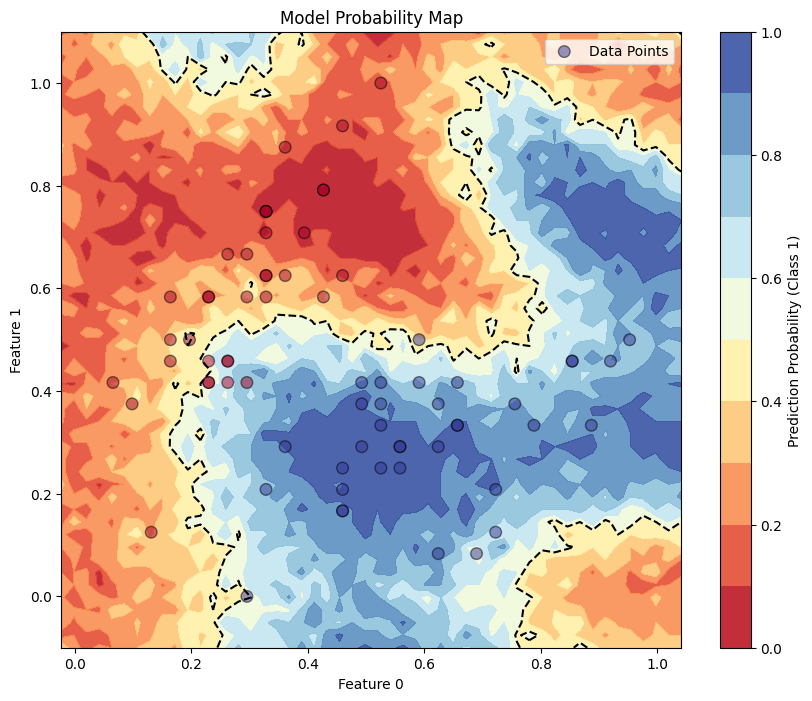

In [30]:
print("=== PLOTTING PROBABILITY MAP ===")
plot_data = plot_probability_map(
    model=advanced_classifier,
    X_data=X_train,
    y_data_scatter=y_train
)



### Grid search

In [18]:
parameters = {
    'encoders': [AngleEncoder, HadRotZRotZZEncoder],
    'ansatz': [SimpleAnsatz, AdvancedAnsatz],
    'learning_rate': [0.01,0.05,0.1],
    'batch_size': [8, 16, 32],
    'layers': [1, 2, 3]
}

configuration_map = {}
config_idx = 0
best_config = None
for encoder in parameters['encoders']:
    for ansatz in parameters['ansatz']:
        for learning_rate in parameters['learning_rate']:
            for batch_size in parameters['batch_size']:
                for layers in parameters['layers']:
                    print(f"Training with {encoder}, {ansatz}, lr={learning_rate}, batch_size={batch_size}, layers={layers}")
                    classifier = QuantumClassifier(
                        num_qubits=X_train.shape[1],
                        encoder=encoder(),
                        ansatz=ansatz(layers),
                        optimizer=AdamOptimizer(learning_rate=learning_rate),
                        shots=30,
                    )
                    training_results = classifier.train(
                        X_train=X_train, 
                        y_train=y_train, 
                        epochs=50, 
                        X_val=X_test, 
                        y_val=y_test,
                        verbose=False,
                        batch_size=batch_size
                    )
                    configuration_map[config_idx] = {
                        "encoder": encoder,
                        "ansatz": ansatz,
                        "learning_rate": learning_rate,
                        "batch_size": batch_size,
                        "layers": layers,
                        "training_results": training_results
                    }
                    if best_config is None or training_results['val_accuracy'][-1] > best_config['training_results']['val_accuracy'][-1]:
                        best_config = configuration_map[config_idx]
                        print(f"New best configuration found: {best_config}")

                    config_idx += 1
print("=== BEST CONFIGURATION ===")
print(best_config)


Training with <class 'quantum_computing.p2.qml.encoders.AngleEncoder'>, <class 'quantum_computing.p2.qml.ansatzes.SimpleAnsatz'>, lr=0.01, batch_size=8, layers=1
New best configuration found: {'encoder': <class 'quantum_computing.p2.qml.encoders.AngleEncoder'>, 'ansatz': <class 'quantum_computing.p2.qml.ansatzes.SimpleAnsatz'>, 'learning_rate': 0.01, 'batch_size': 8, 'layers': 1, 'training_results': {'loss': [5.970332585894741, 5.018009090154206, 6.726011924793266, 5.756021922579406, 4.32916318150472, 3.3656681260499943, 3.3295942771426206, 3.628191960474182, 1.8487061672656242, 1.707782597560562, 1.19683839134514, 1.6290474991077495, 1.0833070753392788, 0.6083708620829272, 0.9704153447103754, 0.5001501075102244, 0.9843854666675168, 0.4866965136576352, 0.4075909927450614, 0.3698399623914419, 0.3483497181354381, 0.3791125515944774, 0.36030915080112125, 0.3350600059246255, 0.3182050720106035, 0.3199383835831306, 0.3068334626267838, 0.33610789296265076, 0.32088306632486036, 0.314667277015

In [99]:
import pandas as pd

# Prepare data for CSV with full training history
csv_data = []
for config_id, config in configuration_map.items():
    training_results = config['training_results']
    num_epochs = len(training_results['loss'])
    
    for epoch in range(num_epochs):
        row = {
            'config_id': config_id,
            'encoder': config['encoder'].__name__,
            'ansatz': config['ansatz'].__name__,
            'learning_rate': config['learning_rate'],
            'batch_size': config['batch_size'],
            'layers': config['layers'],
            'epoch': epoch,
            'train_loss': training_results['loss'][epoch],
            'train_accuracy': training_results['accuracy'][epoch],
            'val_loss': training_results['val_loss'][epoch],
            'val_accuracy': training_results['val_accuracy'][epoch]
        }
        csv_data.append(row)

# Create DataFrame and save to CSV
df_config = pd.DataFrame(csv_data)
df_config.to_csv('quantum_classifier_full_training_history.csv', index=False)
print(f"Saved {len(csv_data)} training records from {len(configuration_map)} configurations to quantum_classifier_full_training_history.csv")

Saved 4586 training records from 108 configurations to quantum_classifier_full_training_history.csv


In [ ]:
angle_encoder_results = {}
advanced_encoder_results = {}

simple_encoder_simple_ansatz = {}
simple_encoder_advanced_ansatz = {}

advanced_encoder_simple_ansatz = {}
advanced_encoder_advanced_ansatz = {}


param_filters = {
    'learning_rate': [0.01,0.05,0.1],  # e.g., [0.01, 0.05] or [] to include all
    'batch_size': [8,16,32],         # e.g., [8, 16] or [] to include all
    'layers': [1,2,3]          # e.g., [1] or [] to include all
}

for i in range(len(configuration_map)):
    config = configuration_map[i]

    include_this_config = True
    for param_key, allowed_values in param_filters.items():
        if allowed_values:  
            if config.get(param_key) not in allowed_values:
                include_this_config = False
                break 
    
    if not include_this_config:
        continue 


    if config['encoder'] == AngleEncoder:
        angle_encoder_results[i] = config
        if config['ansatz'] == SimpleAnsatz:
            simple_encoder_simple_ansatz[i] = config
        elif config['ansatz'] == AdvancedAnsatz:
            simple_encoder_advanced_ansatz[i] = config
    elif config['encoder'] == HadRotZRotZZEncoder:
        advanced_encoder_results[i] = config
        if config['ansatz'] == SimpleAnsatz:
            advanced_encoder_simple_ansatz[i] = config
        elif config['ansatz'] == AdvancedAnsatz:
            advanced_encoder_advanced_ansatz[i] = config


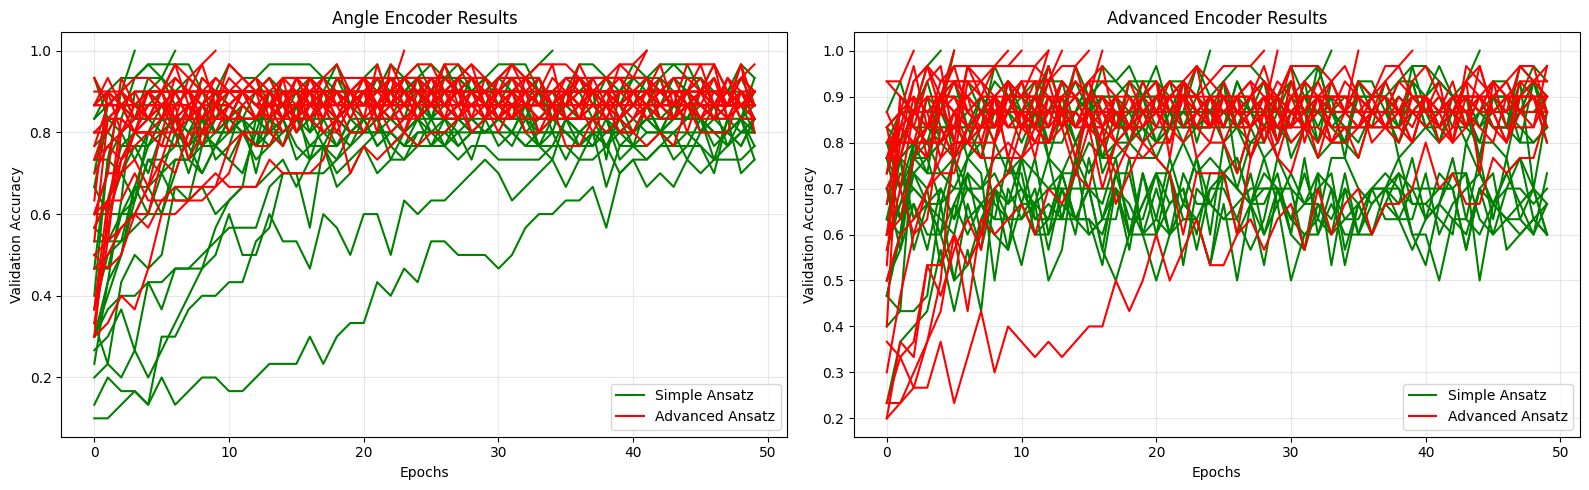

In [101]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot Angle Encoder Results
for key in angle_encoder_results.keys():
    config = angle_encoder_results[key]
    color = 'green' if config['ansatz'] == SimpleAnsatz else 'red'
    label = 'Simple Ansatz' if config['ansatz'] == SimpleAnsatz else 'Advanced Ansatz'
    ax1.plot(config['training_results']['val_accuracy'], color=color, label=label)

ax1.set_title("Angle Encoder Results")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Validation Accuracy")
ax1.grid(True, alpha=0.3)
# Remove duplicate labels in legend
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), fontsize='medium')

# Plot Advanced Encoder Results
for key in advanced_encoder_results.keys():
    config = advanced_encoder_results[key]
    color = 'green' if config['ansatz'] == SimpleAnsatz else 'red'
    label = 'Simple Ansatz' if config['ansatz'] == SimpleAnsatz else 'Advanced Ansatz'
    ax2.plot(config['training_results']['val_accuracy'], color=color, label=label)

ax2.set_title("Advanced Encoder Results")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Validation Accuracy")
ax2.grid(True, alpha=0.3)
# Remove duplicate labels in legend
handles, labels = ax2.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax2.legend(by_label.values(), by_label.keys(), fontsize='medium')

plt.tight_layout()
plt.show()

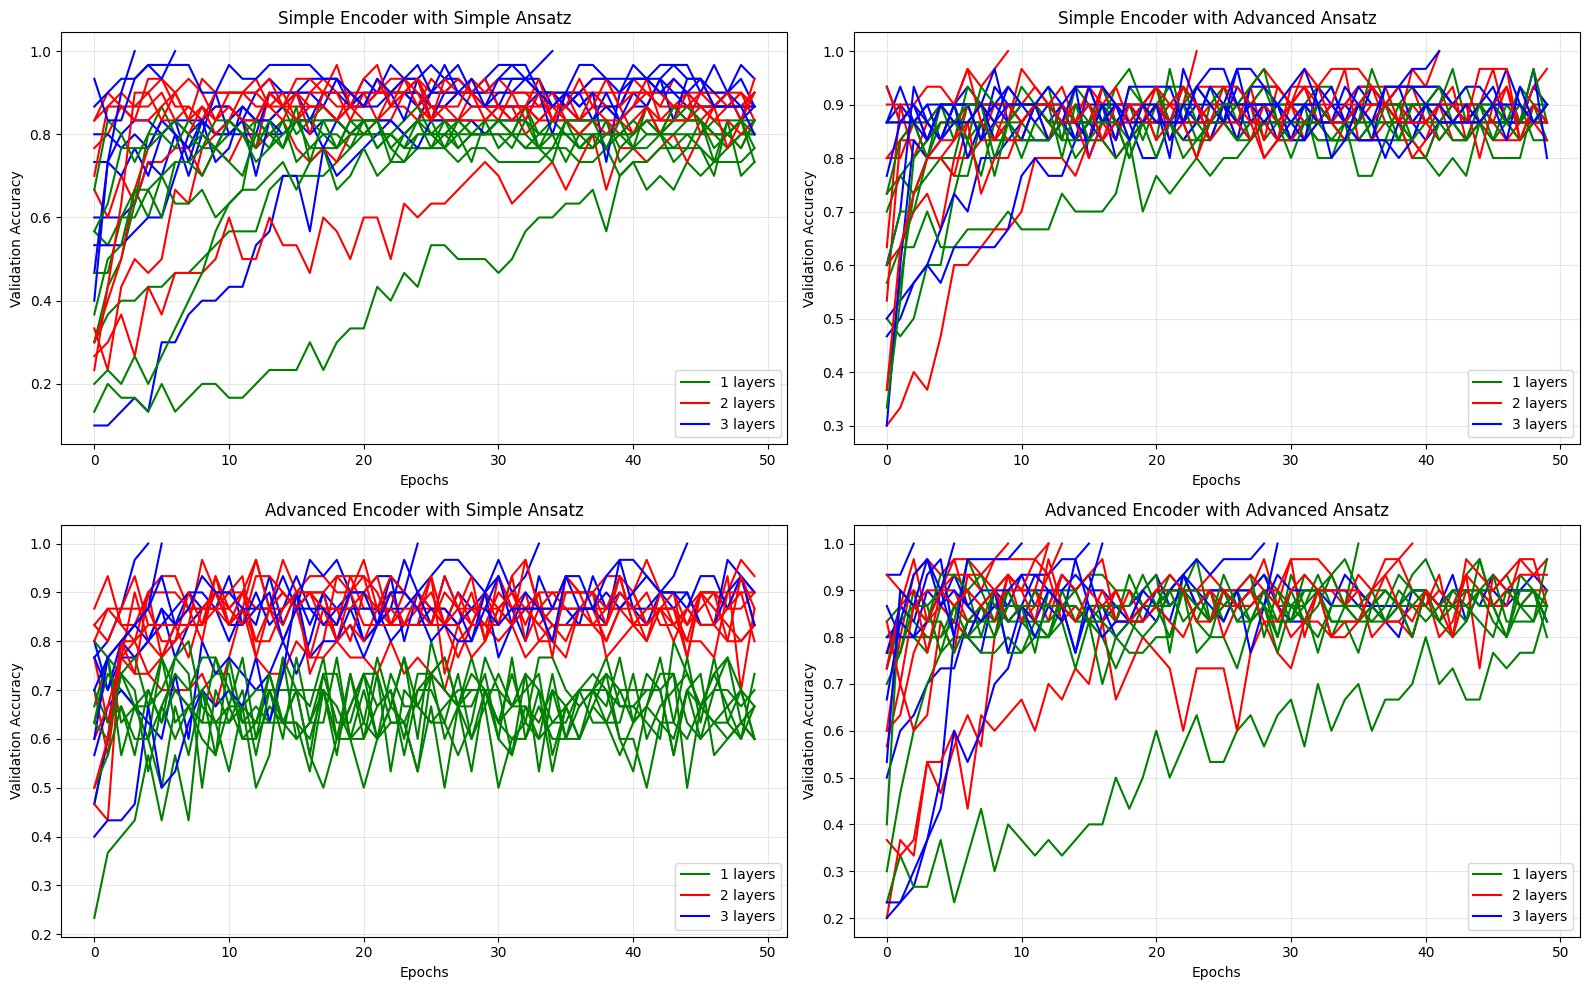

In [100]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))


layer_colors = {1: 'green', 2: 'red', 3: 'blue'}


added_labels = {'ax1': set(), 'ax2': set(), 'ax3': set(), 'ax4': set()}

# Simple Encoder with Simple Ansatz
for key in simple_encoder_simple_ansatz.keys():
    config = simple_encoder_simple_ansatz[key]
    color = layer_colors[config['layers']]
    label = f"{config['layers']} layers" if config['layers'] not in added_labels['ax1'] else ""
    ax1.plot(config['training_results']['val_accuracy'], color=color, label=label)
    added_labels['ax1'].add(config['layers'])
    
ax1.set_title("Simple Encoder with Simple Ansatz")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Validation Accuracy")
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize='medium', loc='lower right')

# Simple Encoder with Advanced Ansatz
for key in simple_encoder_advanced_ansatz.keys():
    config = simple_encoder_advanced_ansatz[key]
    color = layer_colors[config['layers']]
    label = f"{config['layers']} layers" if config['layers'] not in added_labels['ax2'] else ""
    ax2.plot(config['training_results']['val_accuracy'], color=color, label=label)
    added_labels['ax2'].add(config['layers'])
    
ax2.set_title("Simple Encoder with Advanced Ansatz")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Validation Accuracy")
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize='medium', loc='lower right')

# Advanced Encoder with Simple Ansatz
for key in advanced_encoder_simple_ansatz.keys():
    config = advanced_encoder_simple_ansatz[key]
    color = layer_colors[config['layers']]
    label = f"{config['layers']} layers" if config['layers'] not in added_labels['ax3'] else ""
    ax3.plot(config['training_results']['val_accuracy'], color=color, label=label)
    added_labels['ax3'].add(config['layers'])
    
ax3.set_title("Advanced Encoder with Simple Ansatz")
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Validation Accuracy")
ax3.grid(True, alpha=0.3)
ax3.legend(fontsize='medium', loc='lower right')

# Advanced Encoder with Advanced Ansatz
for key in advanced_encoder_advanced_ansatz.keys():
    config = advanced_encoder_advanced_ansatz[key]
    color = layer_colors[config['layers']]
    label = f"{config['layers']} layers" if config['layers'] not in added_labels['ax4'] else ""
    ax4.plot(config['training_results']['val_accuracy'], color=color, label=label)
    added_labels['ax4'].add(config['layers'])
    
ax4.set_title("Advanced Encoder with Advanced Ansatz")
ax4.set_xlabel("Epochs")
ax4.set_ylabel("Validation Accuracy")
ax4.grid(True, alpha=0.3)
ax4.legend(fontsize='medium', loc='lower right')

plt.tight_layout()
plt.show()

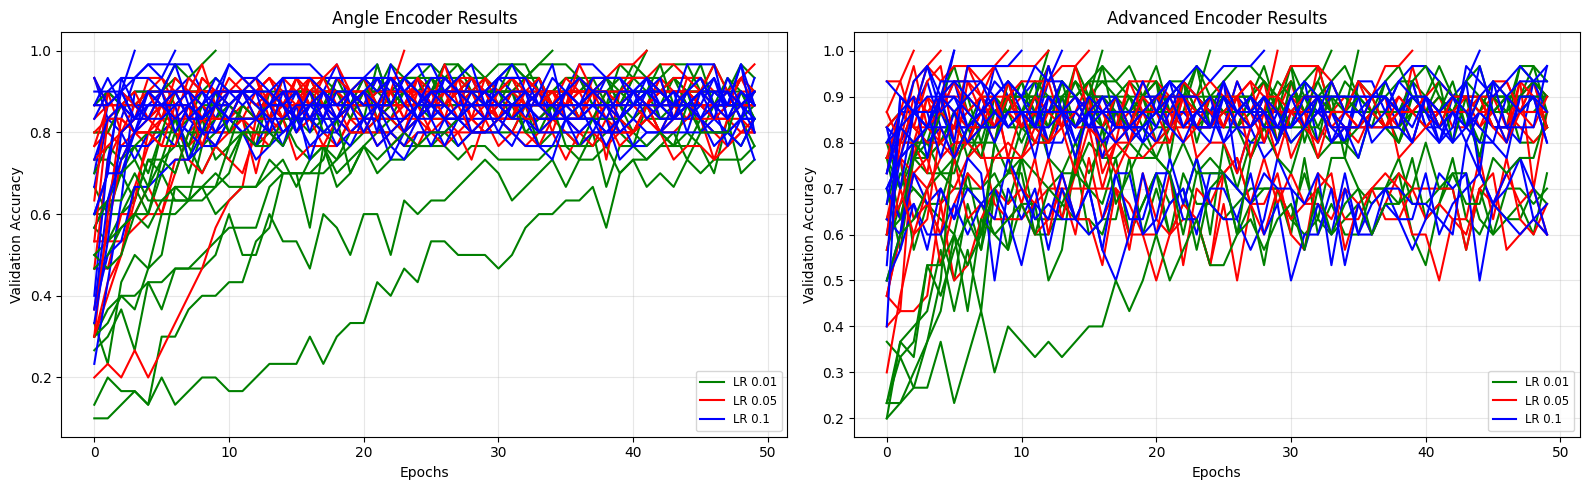

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Define colors for different learning rates
lr_colors = {0.01: 'green', 0.05: 'red', 0.1: 'blue'}

# Plot Angle Encoder Results
for key in angle_encoder_results.keys():
    config = angle_encoder_results[key]
    color = lr_colors[config['learning_rate']]
    label = f'LR {config["learning_rate"]}'
    ax1.plot(config['training_results']['val_accuracy'], color=color, label=label)

ax1.set_title("Angle Encoder Results")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Validation Accuracy")
ax1.grid(True, alpha=0.3)
# Remove duplicate labels in legend
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), fontsize='small')

# Plot Advanced Encoder Results
for key in advanced_encoder_results.keys():
    config = advanced_encoder_results[key]
    color = lr_colors[config['learning_rate']]
    label = f'LR {config["learning_rate"]}'
    ax2.plot(config['training_results']['val_accuracy'], color=color, label=label)

ax2.set_title("Advanced Encoder Results")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Validation Accuracy")
ax2.grid(True, alpha=0.3)
# Remove duplicate labels in legend
handles, labels = ax2.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax2.legend(by_label.values(), by_label.keys(), fontsize='small')

plt.tight_layout()
plt.show()

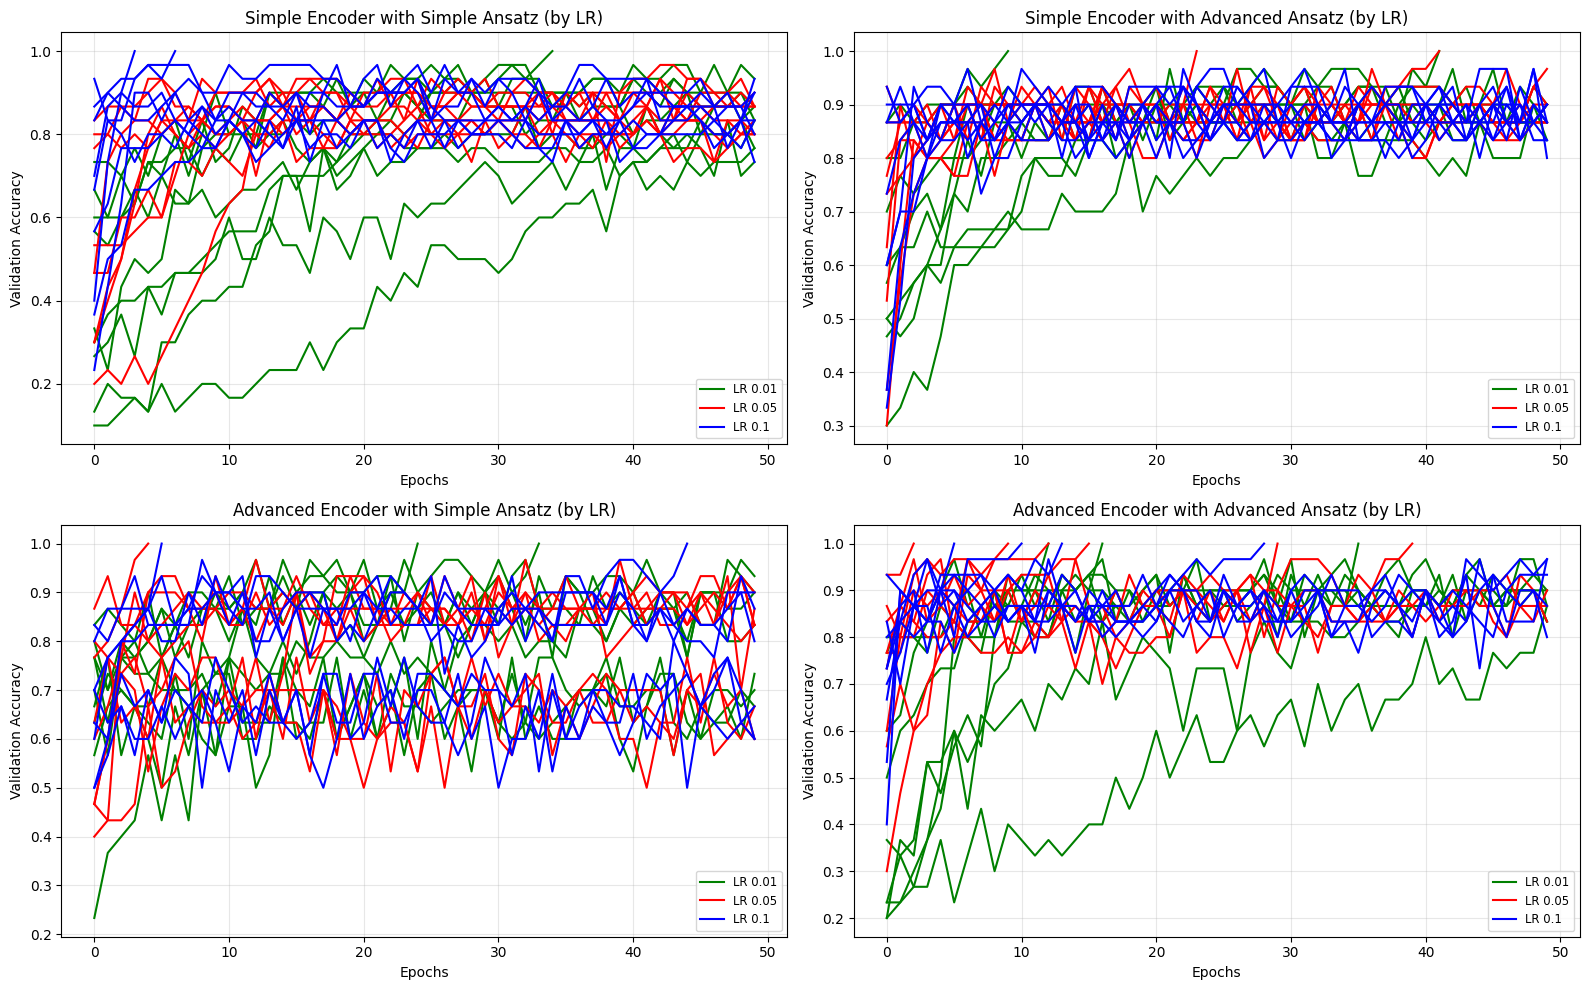

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# lr_colors is already defined in a previous cell:
# lr_colors = {0.01: 'green', 0.05: 'red', 0.1: 'blue'}

# Track which learning rate labels have been added to avoid duplicates in legends
added_labels_lr = {'ax1': set(), 'ax2': set(), 'ax3': set(), 'ax4': set()}

# Simple Encoder with Simple Ansatz - Color by Learning Rate
for key in simple_encoder_simple_ansatz.keys():
    config = simple_encoder_simple_ansatz[key]
    color = lr_colors[config['learning_rate']]
    label = f"LR {config['learning_rate']}" if config['learning_rate'] not in added_labels_lr['ax1'] else ""
    ax1.plot(config['training_results']['val_accuracy'], color=color, label=label)
    if label: # Add to set only if a label was actually generated
        added_labels_lr['ax1'].add(config['learning_rate'])
    
ax1.set_title("Simple Encoder with Simple Ansatz (by LR)")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Validation Accuracy")
ax1.grid(True, alpha=0.3)
handles, labels = ax1.get_legend_handles_labels()
by_label_ax1 = dict(zip(labels, handles)) # To remove duplicate labels if any persist due to multiple lines for same LR
ax1.legend(by_label_ax1.values(), by_label_ax1.keys(), fontsize='small', loc='lower right')


# Simple Encoder with Advanced Ansatz - Color by Learning Rate
for key in simple_encoder_advanced_ansatz.keys():
    config = simple_encoder_advanced_ansatz[key]
    color = lr_colors[config['learning_rate']]
    label = f"LR {config['learning_rate']}" if config['learning_rate'] not in added_labels_lr['ax2'] else ""
    ax2.plot(config['training_results']['val_accuracy'], color=color, label=label)
    if label:
        added_labels_lr['ax2'].add(config['learning_rate'])
    
ax2.set_title("Simple Encoder with Advanced Ansatz (by LR)")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Validation Accuracy")
ax2.grid(True, alpha=0.3)
handles, labels = ax2.get_legend_handles_labels()
by_label_ax2 = dict(zip(labels, handles))
ax2.legend(by_label_ax2.values(), by_label_ax2.keys(), fontsize='small', loc='lower right')

# Advanced Encoder with Simple Ansatz - Color by Learning Rate
for key in advanced_encoder_simple_ansatz.keys():
    config = advanced_encoder_simple_ansatz[key]
    color = lr_colors[config['learning_rate']]
    label = f"LR {config['learning_rate']}" if config['learning_rate'] not in added_labels_lr['ax3'] else ""
    ax3.plot(config['training_results']['val_accuracy'], color=color, label=label)
    if label:
        added_labels_lr['ax3'].add(config['learning_rate'])
    
ax3.set_title("Advanced Encoder with Simple Ansatz (by LR)")
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Validation Accuracy")
ax3.grid(True, alpha=0.3)
handles, labels = ax3.get_legend_handles_labels()
by_label_ax3 = dict(zip(labels, handles))
ax3.legend(by_label_ax3.values(), by_label_ax3.keys(), fontsize='small', loc='lower right')

# Advanced Encoder with Advanced Ansatz - Color by Learning Rate
for key in advanced_encoder_advanced_ansatz.keys():
    config = advanced_encoder_advanced_ansatz[key]
    color = lr_colors[config['learning_rate']]
    label = f"LR {config['learning_rate']}" if config['learning_rate'] not in added_labels_lr['ax4'] else ""
    ax4.plot(config['training_results']['val_accuracy'], color=color, label=label)
    if label:
        added_labels_lr['ax4'].add(config['learning_rate'])
    
ax4.set_title("Advanced Encoder with Advanced Ansatz (by LR)")
ax4.set_xlabel("Epochs")
ax4.set_ylabel("Validation Accuracy")
ax4.grid(True, alpha=0.3)
handles, labels = ax4.get_legend_handles_labels()
by_label_ax4 = dict(zip(labels, handles))
ax4.legend(by_label_ax4.values(), by_label_ax4.keys(), fontsize='small', loc='lower right')

plt.tight_layout()
plt.show()